In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from imblearn.over_sampling import SMOTE

In [219]:
Xtest1 = np.load('Xtest1.npy')
Xtrain1 = np.load('Xtrain1.npy')
Xtrain1_extra = np.load('Xtrain1_extra.npy')
Ytrain1 = np.load('Ytrain1.npy')
Ytrain1_extra = np.load('Ytrain1_extra.npy')

In [220]:
smote = SMOTE()
Xtrain_resampled, Ytrain_resampled = smote.fit_resample(Xtrain1, Ytrain1)

Xtrain_resampled = Xtrain_resampled.reshape(-1, 48, 48, 1)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(Xtrain_resampled, Ytrain_resampled, test_size=0.2, random_state=42)

# Convert labels to categorical (binary classification)
y_train_cat = to_categorical(y_train, 2)
y_val_cat = to_categorical(y_val, 2)

In [221]:
# Build a simple CNN model
model = Sequential([
    Input(shape=(48, 48, 1)),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

In [222]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-5)

# Train the model
history = model.fit(X_train, y_train_cat, batch_size=32, validation_data=(X_val, y_val_cat), epochs=20, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.6407 - loss: 1.3407 - val_accuracy: 0.5141 - val_loss: 2.2100 - learning_rate: 0.0010
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7606 - loss: 0.6074 - val_accuracy: 0.5120 - val_loss: 1.7956 - learning_rate: 0.0010
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.8371 - loss: 0.4104 - val_accuracy: 0.6486 - val_loss: 0.8315 - learning_rate: 0.0010
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.8606 - loss: 0.3540 - val_accuracy: 0.8635 - val_loss: 0.3144 - learning_rate: 0.0010
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8710 - loss: 0.3278 - val_accuracy: 0.8876 - val_loss: 0.2787 - learning_rate: 0.0010
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.8570 - loss: 0.3316 - val_accuracy: 0.7912 - val_loss: 0.7976 - learning_rate: 0.0010
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8636 - loss: 0.3339 - val_acc

In [223]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)

# Calculate F1 Score
f1 = f1_score(y_val, y_val_pred_classes)
print(f"Validation F1 Score: {f1}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Validation F1 Score: 0.84375


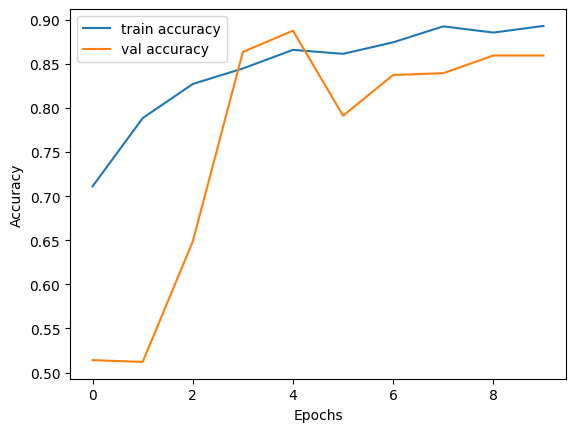

In [224]:
# Plot training history (optional)
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history)
